In [66]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [67]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegi_benchmark_2.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels"])
vegi_df.head(10)

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,Label,Image
0,77,66,140,121,87,0,0.009937,0.495770,Kartoffel,Kartoffel_136
1,204,154,106,94,83,0,0.002228,0.118154,Kartoffel,Kartoffel_134
2,65,62,97,78,55,0,0.778040,0.709109,Kartoffel,Kartoffel_445
3,81,66,88,71,49,0,0.796203,0.870627,Kartoffel,Kartoffel_376
4,67,65,88,69,49,0,0.779564,0.769380,Kartoffel,Kartoffel_437
5,78,58,80,68,51,0,0.834881,0.866015,Kartoffel,Kartoffel_431
6,79,67,81,69,54,0,0.799452,0.873754,Kartoffel,Kartoffel_397
7,77,75,85,69,51,0,0.783463,0.862881,Kartoffel,Kartoffel_393
8,68,51,50,32,12,0,0.813581,0.856689,Kartoffel,Kartoffel_438
9,71,61,81,69,55,0,0.802932,0.873084,Kartoffel,Kartoffel_408


In [68]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
0    294
1    276
2    267
3    260
4    190
5    180
Name: count, dtype: int64

In [69]:
X = vegi_encoded_df.iloc[:, 0:8]
y = vegi_encoded_df.iloc[:, 8:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Image names are only for assignment from datapoint to corresponding image
image_names = y_train.iloc[:,1]  
image_names_test = y_test.iloc[:,1]

y_train_clean = y_train.drop(columns="Image")
y_test_clean = y_test.drop(columns="Image")

In [70]:
X = vegi_encoded_df.iloc[:, 0:8]
y = vegi_encoded_df.iloc[:, 8:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Image names are only for assignment from datapoint to corresponding image
image_names = y_train.iloc[:,1]  
image_names_test = y_test.iloc[:,1]

y_train_clean = y_train.drop(columns="Image")
y_test_clean = y_test.drop(columns="Image")

In [71]:
print(X_train.head())
print(X_test.head())
print(y_train_clean.head())
print(y_test_clean.head())
print(image_names.head())

      Hight  Width    R    G   B  green onion pixels  ratio area  circularity
1367    114     80  124   96  64                   0    0.778564     0.802140
733     109    109  120   66  56                   0    0.698805     0.679840
852     285    116  101   89  48                6356    0.480913     0.308431
1037    245    127  130  118  83                1340    0.533489     0.208252
1405    103     71  106   75  37                   0    0.611924     0.449701
      Hight  Width    R    G   B  green onion pixels  ratio area  circularity
1192    171    130   65   68  63                 596    0.573144     0.317039
184     255    102  113   87  65                   0    0.620473     0.238582
1220    267    216   97   68  41                   0    0.000321     0.042433
67       96     65   63   53  41                   0    0.811619     0.822255
220     238    149  115  106  94                   9    0.000169     0.123223
      Label
1367      4
733       2
852       3
1037      3
1405

In [72]:
y_train_clean_2 = y_train_clean.to_numpy()
clf_tree = DecisionTreeClassifier(criterion='log_loss')
clf_tree.fit(X_train, y_train_clean_2)

DecisionTreeClassifier(criterion='log_loss')

In [73]:
clf_tree.get_depth()

16

In [74]:
clf_tree.get_n_leaves()

204

In [75]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [76]:
accuracy_testdata = accuracy_score(y_test_clean, y_test_pred)
accuracy_traindata = accuracy_score(y_train_clean_2, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

number_correct_testdata = accuracy_score(y_test_clean, y_test_pred, normalize=False)
number_correct_traindata = accuracy_score(y_train_clean_2, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: 0.7520435967302452
Accuracy Train: 1.0
Number Correct Predicions Test: 276
Number Correct Predicions Train: 1100


In [54]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_5 <= 203.00
|   |--- feature_7 <= 0.52
|   |   |--- feature_1 <= 68.50
|   |   |   |--- feature_0 <= 125.50
|   |   |   |   |--- feature_2 <= 151.50
|   |   |   |   |   |--- feature_4 <= 47.50
|   |   |   |   |   |   |--- feature_6 <= 0.30
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_6 >  0.30
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_4 >  47.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  151.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  125.50
|   |   |   |   |--- feature_0 <= 175.50
|   |   |   |   |   |--- feature_4 <= 92.50
|   |   |   |   |   |   |--- feature_4 <= 35.00
|   |   |   |   |   |   |   |--- feature_2 <= 98.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_2 >  98.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_4 >  35.00
|   |   |   |   |   |   |   |--- feature_0 <=

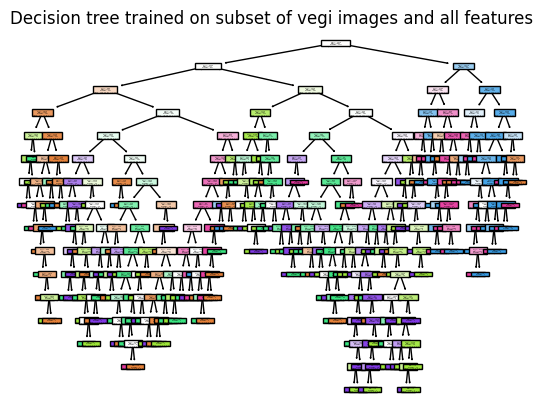

In [52]:
fig = plt.figure()
_ = tree.plot_tree(clf_tree, filled=True)
plt.title("Decision tree trained on subset of vegi images and all features")
fig.savefig("decistion_tree.png")

In [32]:
a = X_train.iloc[200].to_numpy()
a

array([237.        ,  85.        , 132.        ,  97.        ,
        52.        , 105.        ,   0.59496153,   0.35963658])

In [24]:
a

array([237.        ,  85.        , 132.        ,  97.        ,
        52.        , 105.        ,   0.59496153,   0.35963658])

In [16]:

pred_vegi = tree.predict(X_train.iloc[200].to_numpy().reshape(-1, 1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train_clean_2[200]}")

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 8 features as input.